<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Numerical-Features" data-toc-modified-id="Numerical-Features-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Numerical Features</a></span></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Object-Features" data-toc-modified-id="Object-Features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Object Features</a></span></li><li><span><a href="#Skewness" data-toc-modified-id="Skewness-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Skewness</a></span></li></ul></li><li><span><a href="#Targets" data-toc-modified-id="Targets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Targets</a></span><ul class="toc-item"><li><span><a href="#Binary-target" data-toc-modified-id="Binary-target-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Binary target</a></span></li><li><span><a href="#Discrete-Target" data-toc-modified-id="Discrete-Target-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Discrete Target</a></span></li><li><span><a href="#Socio-economic-environment-and-urbanicity" data-toc-modified-id="Socio-economic-environment-and-urbanicity-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Socio-economic environment and urbanicity</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#Correlations-between-numerical-features,-excluding-US-census-data" data-toc-modified-id="Correlations-between-numerical-features,-excluding-US-census-data-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Correlations between numerical features, excluding US census data</a></span></li><li><span><a href="#Promotion-history-correlations" data-toc-modified-id="Promotion-history-correlations-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Promotion history correlations</a></span></li><li><span><a href="#Giving-history-correlations" data-toc-modified-id="Giving-history-correlations-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Giving history correlations</a></span></li><li><span><a href="#Puttting-donors-on-a-map" data-toc-modified-id="Puttting-donors-on-a-map-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Puttting donors on a map</a></span></li><li><span><a href="#The-US-census-data" data-toc-modified-id="The-US-census-data-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>The US census data</a></span></li><li><span><a href="#Income,-Wealth-and-donations" data-toc-modified-id="Income,-Wealth-and-donations-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Income, Wealth and donations</a></span></li></ul></li></ul></div>

# Exploratory Data Analysis
This notebook contains all code for the prelimiatory analysis of the KDD Cup 98 datasets

In [1]:
%load_ext autoreload

In [2]:
# Set up logging and graphics defaults
%run ./common_init.ipynb

Setup logging to file: out.log
Figure output directory saved in figure_output at /home/datarian/OneDrive/unine/Master_Thesis/ma-thesis-report/figures


In [3]:
%autoreload 2

import kdd98.data_handler as dh
import kdd98.utils_transformer as ut
from kdd98.transformers import *

# Where to save the figures
IMAGES_PATH = pathlib.Path(figure_output/'eda')

pathlib.Path(IMAGES_PATH).mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = pathlib.Path(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Using TensorFlow backend.


In [4]:
plt.rcParams['figure.figsize'] = (12, 8)

In [5]:
data_provider = dh.KDD98DataProvider("cup98LRN.txt")

In [6]:
raw = data_provider.raw_data

In [100]:
preprocessed = data_provider.preprocessed_data

## Overview

A first, general look at the data structure:

In [ ]:
raw.info()

* There are 481 features (of which one is the index)
* A total of 95412 examples
* 24 categorical features, 53 datetime features, 48 numerical features with missing values, 297 integer features without missing values and 56 string features

In [ ]:
raw.head()

### Numerical Features

In [ ]:
numerical = raw.select_dtypes(include=np.number).columns
print("There are {:1} numerical features".format(len(numerical)))

### Categorical Features

Categories were defined on import of the csv data. The categories were identified in the dataset dictionary.

In [ ]:
categories = raw.select_dtypes(include='category').columns
print(categories)

In [ ]:
raw.loc[:, categories].describe().transpose()

### Object Features

The date features are not yet encoded into actual dates. Therefore, they still show as objects.

In [ ]:
objects = raw.select_dtypes(include='object').columns
print(objects)

In [ ]:
raw.loc[:, objects].describe().transpose()

### Skewness

Pandas calculates the adjusted Fisher-Pearson standardized moment coefficient.

In [101]:
preprocessed_skew = preprocessed.select_dtypes(include="number").skew()

In [102]:
preprocessed_skew = pd.DataFrame(preprocessed_skew, columns=["skew_stat"])
preprocessed_skew.index.name = "feature"

In [103]:
def calc_conf_bound(feature):
    # Under H_0, mean = 0 and var(feature) = var(N(0,6))
    n = feature.count()
    return 1.96*np.sqrt(6*n*(n-1)/((n-2)*(n+1)*(n+3))) / np.sqrt(n)

def within_bound(feature):
    return "Yes" if abs(feature.skew_stat) < feature.conf_bound else "No"

In [104]:
conf_bound = pd.DataFrame(preprocessed.apply(calc_conf_bound, axis=0, result_type="expand"), columns=["conf_bound"])
conf_bound.index.name = "feature"

In [105]:
skew = preprocessed_skew.merge(conf_bound, on=preprocessed_skew.index.name)

In [106]:
skew['inside_ci'] = skew.apply(within_bound, axis=1, result_type="expand")

In [107]:
skew.inside_ci.value_counts()

No    398
Name: inside_ci, dtype: int64

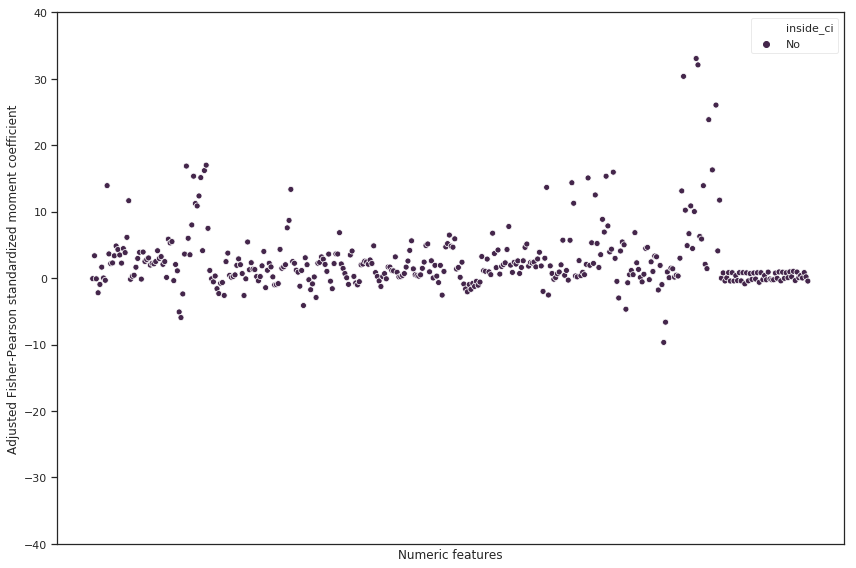

In [110]:
ax = sns.scatterplot(x=skew.index, y=skew.skew_stat, hue=skew.inside_ci)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel("Numeric features")
plt.ylabel("Adjusted Fisher-Pearson standardized moment coefficient")
plt.ylim(-40,40)
save_fig("skewness_numeric_features")

In [111]:
most_skewed = skew.sort_values(by="skew_stat",ascending=True).dropna().tail(n=10).sort_values(by="skew_stat",ascending=False)
most_skewed

,skew_stat,conf_bound,inside_ci
feature,,,
MAXRAMNT,99.783762,0.000050,No
TIMELAG,52.624164,0.000056,No
RAMNT_18,33.059062,0.000243,No
RAMNT_19,32.098418,0.000302,No
RAMNT_9,30.370612,0.000287,No
AVGGIFT,26.049429,0.000050,No
MINRAMNT,23.849919,0.000050,No
ETH15,17.002337,0.000050,No
ETH3,16.864883,0.000050,No


In [112]:
preprocessed.loc[:,most_skewed.index].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Data columns (total 10 columns):
MAXRAMNT    95412 non-null float64
TIMELAG     85439 non-null float64
RAMNT_18    19778 non-null float64
RAMNT_19    15877 non-null float64
RAMNT_9     16734 non-null float64
AVGGIFT     95412 non-null float64
MINRAMNT    95412 non-null float64
ETH15       95412 non-null int64
ETH3        95412 non-null int64
LASTGIFT    95412 non-null float64
dtypes: float64(8), int64(2)
memory usage: 8.0 MB


In [113]:
preprocessed.loc[:,most_skewed.index].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feature,,,,,,,,
MAXRAMNT,95412.0,19.999790,25.067746,5.000000,14.000000,17.000000,23.000000,5000.0
TIMELAG,85439.0,8.093739,8.213242,0.000000,4.000000,6.000000,11.000000,1088.0
RAMNT_18,19778.0,12.283269,11.787762,1.000000,6.000000,10.000000,15.000000,1000.0
RAMNT_19,15877.0,13.116019,12.847063,1.000000,8.000000,10.000000,15.000000,970.0
RAMNT_9,16734.0,15.101013,13.020388,1.000000,10.000000,14.000000,20.000000,1000.0
AVGGIFT,95412.0,13.347786,10.769997,1.285714,8.384615,11.636364,15.477955,1000.0
MINRAMNT,95412.0,7.933656,8.784231,0.000000,3.000000,5.000000,10.000000,1000.0
ETH15,95412.0,0.327433,3.208650,0.000000,0.000000,0.000000,0.000000,81.0
ETH3,95412.0,0.776904,3.469319,0.000000,0.000000,0.000000,1.000000,99.0


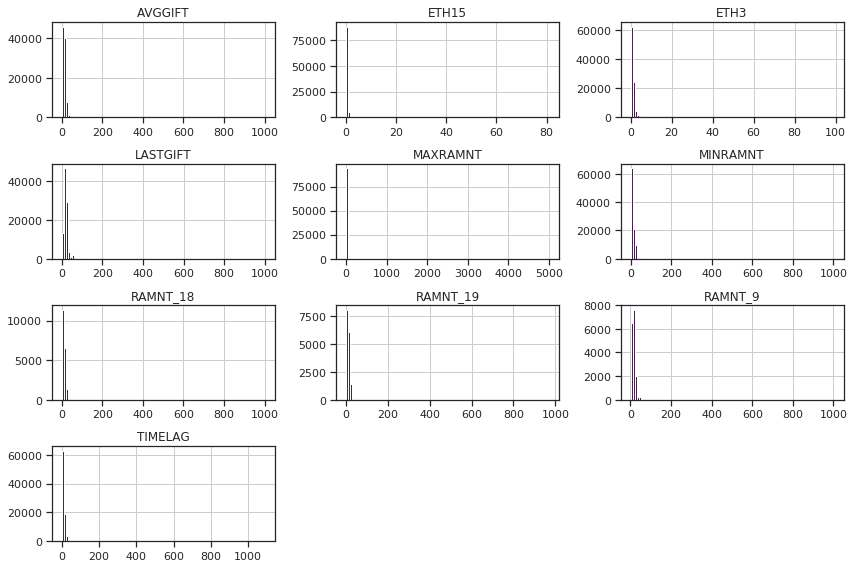

In [114]:
preprocessed.loc[:,most_skewed.index].hist(bins=100)
save_fig("most_skewed")

In [116]:
least_skewed = skew.loc[abs(skew.skew_stat) <= 0.1, ["skew_stat", "conf_bound"]].applymap(abs).sort_values(by="skew_stat").head(9)

In [117]:
preprocessed.loc[:,least_skewed.index].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Data columns (total 9 columns):
HPHONE_D    95412 non-null Int64
RFA_23A     39116 non-null Int64
INCOME      74126 non-null Int64
HHAS3       95412 non-null int64
RFA_18A     74149 non-null Int64
RFA_16A     74995 non-null Int64
CLUSTER2    95280 non-null float64
HVP4        95412 non-null int64
RFA_19A     70920 non-null Int64
dtypes: Int64(6), float64(1), int64(2)
memory usage: 7.8 MB


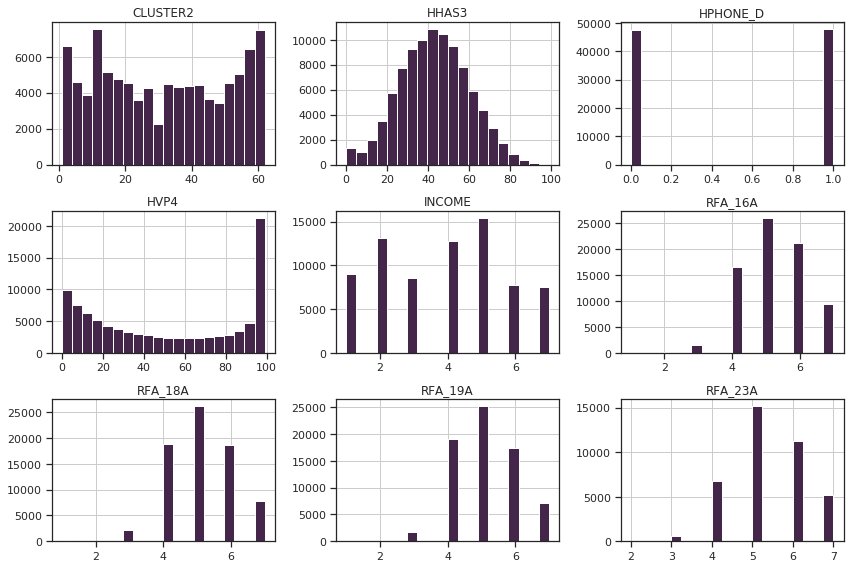

In [118]:
preprocessed.loc[:,least_skewed.index].astype("float64").hist(bins=20);
save_fig("least_skewed")

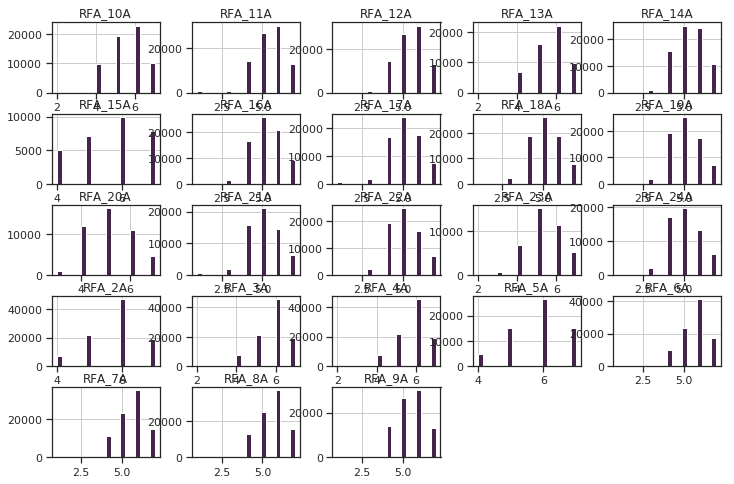

In [119]:
preprocessed.filter(regex=r"RFA_[0-9]{1,2}A").astype("float64").hist(bins=20);

For the categorical features, we plot histograms

In [ ]:
preprocessed.select_dtypes(include="category")

In [99]:
preprocessed.select_dtypes(include="category").reindex().apply(pd.Series.value_counts, axis=0)

ValueError: cannot reindex with a non-unique indexer

In [ ]:
#d.plotting.scatter_matrix(preprocessed.select_dtypes(include="category").apply(pd.Series.value_counts, axis=1))
#save_fig("categorical_skew")

## Targets

### Binary target
TARGET_B indicates wheter an example donated in the current campaign.

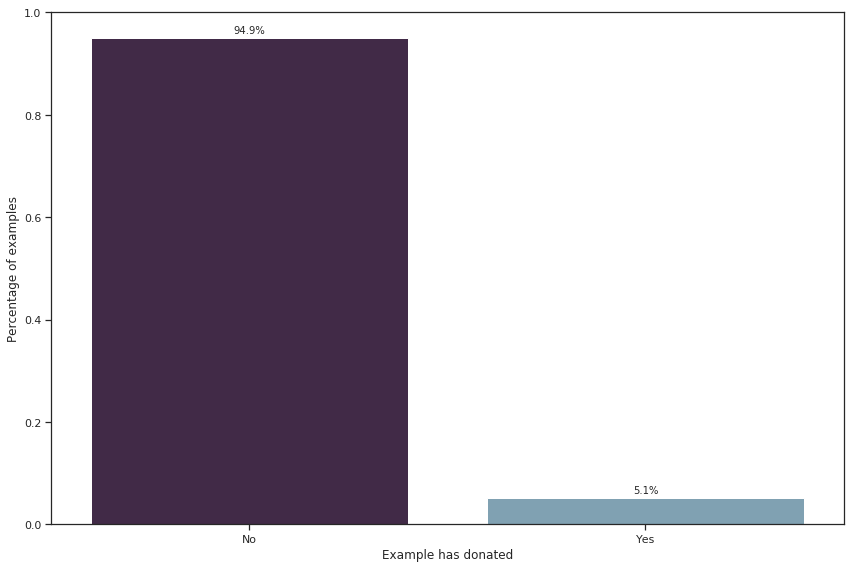

In [23]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() +0.01
            value = '{:.1%}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

fig = sns.barplot(x = [0,1], y = preprocessed.groupby('TARGET_B')['TARGET_B'].count()/len(preprocessed.index),
                  palette=Config.get("color_palette_binary"));
fig.set_xticklabels(["No", "Yes"]);
plt.xlabel("Example has donated");
plt.ylabel("Percentage of examples");
plt.ylim([0,1])
show_values_on_bars(fig)

save_fig(fig_id="ratio_binary");

### Discrete Target
TARGET_D represents the dollar amount donated in the current campaign.

In [24]:
preprocessed.TARGET_D.describe()

count    95412.000000
mean         0.793073
std          4.429725
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        200.000000
Name: TARGET_D, dtype: float64

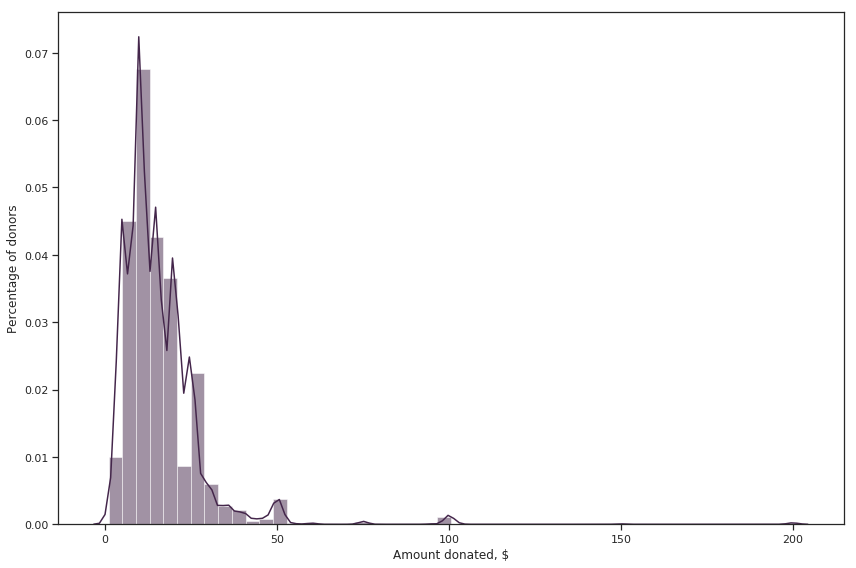

In [25]:
fig = sns.distplot(preprocessed.loc[preprocessed.TARGET_D > 0, 'TARGET_D'], bins=50, hist_kws={'alpha': 0.5}, color=Config.get("color_palette")[0])
plt.ylabel("Percentage of donors");
plt.xlabel("Amount donated, \$")
save_fig('target_distribution')

In [ ]:
preprocessed.loc[preprocessed.TARGET_D > 0.0, 'TARGET_D'].median()

* The label is imbalanced, with roughly 95% / 5%
* Most donations are below 20 dollars. The median is 13 \$
* Spikes are visible for 5, 10, 15, 20, 25, 50, 100 and 200 $
* The distribution is right-skewed

Checking the claim from the documentation that donations are positively correlated with the time since the last donation. We plot the duration since the last gift against the donation amount for the current campaign. The marker size indicates the total number of times an example has donated so far.

It is evident that from a lag of &geq; 15 months, donations increase indeed, and over the whole spectrum of amounts. We see a marked difference in 100- and 50 $ donations.

For this analysis, we need to transform the raw date features to time differences. When preprocessing the data, this is taken care of. So we briefly get the preprocessed data for this:

In [ ]:
preprocessed.AVGGIFT.describe()

In [ ]:
numeric = data_provider.numeric_data

In [ ]:
numeric.NGIFTALL.unique()

In [ ]:
sns.scatterplot(x='LASTDATE_DELTA_MONTHS',y='TARGET_D', size='Nr. of times donated', alpha=0.4, data=numeric.loc[preprocessed.TARGET_D > 0,:].rename(columns = {"NGIFTALL": "Nr. of times donated"}),
                palette=Config.get("color_palette_binary"), sizes=(1, 200))

plt.xlabel("Months since last donation of active donors");
plt.ylabel("Amount donated, \$");
save_fig(fig_id="donations_vs_time_since_last_size_nbr_donations")

### Socio-economic environment and urbanicity

Donations by living environment (C=City, R=Rural, S=Suburban, T=Town,U=Urban; lowest numbers represent highest socio-economic ranking). Major donors versus non-major donors.

Surprisingly, one of the top donations came from a rural region of low socio-economic status. Major donors that donated this time are not present in the lowest socio-economic environments.

In [ ]:
socioec_data = preprocessed.loc[preprocessed.TARGET_D > 0, ["TARGET_D", "RAMNTALL", "WEALTH1", "WEALTH2", "CLUSTER", "DOMAINUrbanicity", "DOMAINSocioEconomic"]]
maj_data = raw.loc[:,["MAJOR"]].rename(columns = {"MAJOR": "Major donor"})
maj_data["Major donor"] = maj_data.loc[:, "Major donor"].map({" ": "No", "X": "Yes", "": "No"})
socioec_data = socioec_data.merge(maj_data, on=socioec_data.index.name)
socioec_data.DOMAINUrbanicity.cat.reorder_categories(['C', 'U', 'S', 'T', 'R'], inplace=True)

In [ ]:
fig = sns.violinplot(y="TARGET_D",
               x="DOMAINUrbanicity",
               hue='Major donor',
               cut=0,
               data=socioec_data,
               palette=Config.get("color_palette_binary"),
               legend_out=True)
fig.set_yscale('log')
                   
#new_labels = ['No', 'Yes']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.xlabel("Living environment");
plt.ylabel("Amount donated, \$");
plt.ylim(0.9, 300)
save_fig(fig_id="donations_vs_living_environment_hue_major")

All-time donations by environment. The y- axis is in log scale. We see now that each socio-economic environment also harbours major donors.

In [ ]:
fig=sns.boxplot(y="RAMNTALL",
                x="DOMAINUrbanicity",
                hue='Major donor',
                data=socioec_data,
                palette=Config.get("color_palette_binary"))
fig.set_yscale('log')
plt.xlabel("Living environment (C: City, R: Rural, S: Suburban, T: Town, U:Urban)");
plt.ylabel("Lifetime amount donated, dollar US");
save_fig(fig_id="all_time_donations_vs_living_environment")

In [ ]:
urb_aggr = {
    "RAMNTALL": {
        "total_donations": 'sum',
        'average_per_capita': lambda x: sum(x) / len(x)
    }
}

urb_aggregated = socioec_data.groupby("DOMAINUrbanicity").agg(urb_aggr)
urb_aggregated.RAMNTALL.total_donations.plot(kind="bar", colormap=Config.get("color_map"))

plt.xlabel("Living environment");
plt.ylabel("Cumulative donations, \$");

In [ ]:
fig=sns.boxplot(y="RAMNTALL", x="DOMAINSocioEconomic", hue='Major donor',
                data=socioec_data, palette=Config.get("color_palette_binary"))
fig.set_yscale('log')
plt.xlabel("Socio-economic status (1 highest, 3 lowest)");
plt.ylabel("Lifetime amount donated, dollar US");
save_fig(fig_id="all_time_donations_vs_socio_economic")

### Correlations

Since there are so many features, we will plot those who have a significant correlation only.

In [ ]:
corr_all = preprocessed.drop(['TARGET_B','TARGET_D'], axis=1).corr()

In [ ]:
mask_all = np.zeros_like(corr_all, dtype=np.bool)
mask_all[np.triu_indices_from(mask_all)] = True

sns.heatmap(corr_all,
            cmap=Config.get("color_map_diverging"), mask=mask_all, vmax=1.0, center = 0.0, square=True,
            linewidths = 0)

### Correlations between numerical features, excluding US census data

In [ ]:
data_exclude_census_numeric = preprocessed[preprocessed.columns.difference(dh.US_CENSUS_FEATURES)].select_dtypes(include=["float64"])

In [ ]:
data_exclude_census_corr = data_exclude_census_numeric[data_exclude_census_numeric.columns.difference(['TARGET_B','TARGET_D'])].corr()

In [ ]:
mask_census = np.zeros_like(data_exclude_census_corr, dtype=np.bool)
mask_census[np.triu_indices_from(mask_census)] = True

sns.heatmap(data_exclude_census_corr, mask=mask_census, cmap=Config.get("color_map_diverging"), vmax=1.0, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, xticklabels=True,yticklabels=True)

### Promotion history correlations

In [ ]:
donation_responses = preprocessed.loc[:,dh.GIVING_HISTORY + dh.GIVING_HISTORY_SUMMARY]
multibytes = preprocessed.loc[:,]

In [ ]:
promotion_history_features = preprocessed.reindex(columns=dh.PROMO_HISTORY_SUMMARY+dh.PROMO_HISTORY_DATES)
prom_hist_corr = promotion_history_features[promotion_history_features.columns.difference(['TARGET_B','TARGET_D'])].corr()

In [ ]:
mask_promo = np.zeros_like(prom_hist_corr, dtype=np.bool)
mask_promo[np.triu_indices_from(mask_promo)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(prom_hist_corr, mask=mask_promo, cmap=Config.get("color_map_diverging"), vmax=1.0, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5}, xticklabels=True,yticklabels=True)
save_fig(fig_id="correlations_promotion_giving_history")

### Giving history correlations

In [ ]:
giving_hist_f = dh.GIVING_HISTORY + dh.GIVING_HISTORY_SUMMARY +['LASTDATE_DELTA_MONTHS', 'MINRDATE_DELTA_MONTHS',
       'MAXRDATE_DELTA_MONTHS', 'MAXADATE_DELTA_MONTHS']
giving_history_features = preprocessed.reindex(columns=giving_hist_f)
giving_corr = giving_history_features[giving_history_features.columns.difference(['TARGET_B','TARGET_D'])]

In [ ]:
mask_giving = np.zeros_like(giving_corr, dtype=np.bool)
mask_giving[np.triu_indices_from(mask_giving)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(giving_corr, mask=mask_giving, cmap=Config.get("color_map_diverging"), vmax=1.0, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, xticklabels=True,yticklabels=True)
save_fig(fig_id="correlations_giving_history")

### Puttting donors on a map

In [ ]:
num_donors_by_zip = preprocessed[['ZIP', 'TARGET_B']].groupby('ZIP', as_index=False).agg('sum') # number of people who donated
num_members_by_zip = preprocessed[['ZIP', 'TARGET_B']].groupby('ZIP', as_index=False).agg('count') # number of people who are registered at that ZIP
cum_donation_by_zip = preprocessed[['ZIP', 'TARGET_D']].groupby('ZIP', as_index=False).agg('sum')
zip_states = preprocessed[['ZIP','STATE']].drop_duplicates()

In [ ]:
data_by_zip = cum_donation_by_zip.merge(num_members_by_zip, on='ZIP').merge(zip_states, on='ZIP')
data_by_zip.columns = ["ZIP", "CumDonation", "MemberCount", "State"]

In [ ]:
def rel_donation(row):
    if row.CumDonation != 0.0:
        return row.CumDonation/(1.0 if row.MemberCount == 0.0 else row.MemberCount)
    else:
        return 0.0

data_by_zip['RelDonation'] = data_by_zip.apply(rel_donation,axis=1)

In [ ]:
from geopy.geocoders import Here
from geopy.extra.rate_limiter import RateLimiter
from geopy.exc import GeocoderTimedOut

def do_geo_query(q):
    geolocator = Here(app_id="ZJBxigwxa1QPHlWrtWH6", app_code="OJBun02aepkFbuHmYn1bOg")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=0.01, max_retries=4)
    try:
        return geolocator.geocode(query=q, exactly_one=True)
    except GeocoderTimedOut:
        return do_geo_query(q)

def get_location(example):
    if example.ZIP:
        zip = str(example.ZIP).rjust(5, '0')
        q = {'postalcode': zip, 'state': example.STATE}
        location = do_geo_query(q)
        if location:
            loc = {'ZIP_latitude': location.latitude, 'ZIP_longitude': location.longitude}
        else: 
            logger.info("No location found for zip {} in state {}. Setting to 0, 0"
                        .format(zip, example.STATE))
            loc = {'ZIP_latitude': 0, 'ZIP_longitude': 0}
    else:
        print("ZIP is NaN, setting location to NaN as well.")
        loc = {'ZIP_latitude': np.nan, 'ZIP_longitude': np.nan}
    return loc

def extract_coords(example):
    try:
        return locations[example.ZIP]
    except KeyError:
        if example.STATE in ["AA", "AE", "AP"]:  # military zip, no coords available
            locations[example.ZIP] = {'ZIP_latitude': 38.8719, 'ZIP_longitude': 77.0563}
        else:
            try:
                loc = get_location(example)
                locations[example.ZIP] = loc
            except Exception as e:
                logger.info("Failed to retrieve missing zip. Reason: {}"
                            .format(e))
        return locations[example.ZIP]

In [ ]:
import pickle
with open(pathlib.Path(Config.get("data_dir"), "zip_db.pkl"), "rb") as zdb:
    locations = pickle.load(zdb)

In [ ]:
data_by_zip[['latitude', 'longitude']] = data_by_zip.apply(extract_coords, axis=1, result_type="expand")

AA, AE and AP stand for armed services. ZIP codes don't work here, they point anywhere. Also, we only include locations where someone has actually donated by filtering on CumDonation.

In [ ]:
data_by_zip1 = data_by_zip.loc[data_by_zip.State != ['AA','AE','AP'],:]
data_by_zip2 = data_by_zip1.loc[data_by_zip1.CumDonation > 0.0,:]

In [ ]:
data_by_zip_only_donations = data_by_zip.loc[data_by_zip.CumDonation > 0.0,:]

In [ ]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature
fig = plt.figure(figsize=(20,18))

osm_terrain = cimgt.OSM()


ax = fig.add_subplot(1, 1, 1, projection=osm_terrain.crs)

ax.set_extent([-166, -65, 10, 65], crs=ccrs.PlateCarree())
ax.set_extent([-130, -65, 10, 52], crs=ccrs.PlateCarree())
ax.add_image(osm_terrain, 6)

lon = data_by_zip_only_donations.longitude
lat = data_by_zip_only_donations.latitude
mc = data_by_zip_only_donations.MemberCount
cd = data_by_zip_only_donations.CumDonation
rd = data_by_zip_only_donations.RelDonation

data_by_zip_only_donations.plot(kind="scatter",x="longitude",y="latitude",ax=ax,
                  s=rd, c=cd, label="Donation per capita",
                  legend=True, alpha=0.4, cmap=Config.get("color_map"),
                  subplots=True, colorbar=True, transform=ccrs.PlateCarree())
            
save_fig(fig_id="donations_geographical")

* Most donations come from the urban areas, especially San Francisco, Los Angeles, Miami, Chicago and Detroit. To a lesser extent, cities like Houston, Dallas, Minneapolis, Atlanta, Tampa, Seattle and Phoenix can be made out.
* Interestingly, the East Coast has not donated, despite featuring some large metropolitan areas like New York, Boston, or Washington

### The US census data

In [ ]:
census = raw[dh.US_CENSUS_FEATURES]
census_corr = census.corr()

In [ ]:
mask = np.zeros_like(census_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(census_corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5})
save_fig(fig_id="correlation_census")

### Income, Wealth and donations

In [ ]:
inc_targ = sns.violinplot(x="INCOME", y="TARGET_D", data=preprocessed.loc[preprocessed.TARGET_D > 0.0, ["INCOME","TARGET_D"]])
inc_targ.set_yscale('log')
plt.show()

In [ ]:
weal1_targ = sns.violinplot(x="WEALTH1", y="TARGET_D", data=preprocessed.loc[preprocessed.TARGET_D > 0.0, ["WEALTH1","TARGET_D"]])
weal1_targ.set_yscale('log')
plt.show()

In [ ]:
weal2_targ = sns.violinplot(x="WEALTH2", y="TARGET_D", data=preprocessed.loc[preprocessed.TARGET_D > 0.0, ["WEALTH2","TARGET_D"]])
weal2_targ.set_yscale('log')
plt.show()

In [ ]:
sns.catplot(x="WEALTH2", y="TARGET_D", hue="Major donor",
            kind="violin", inner="stick", split=True, data=socioec_data)

In [ ]:
sns.catplot(x="CLUSTER", y="TARGET_D", kind="box", data=socioec_data)

In [ ]:
sns.distplot(preprocessed.loc[preprocessed.TARGET_D > 0.0,
                          'TARGET_D'], bins=50, kde=False, rug=True)

In [ ]:
preprocessed.select_dtypes(include=np.float).hist(bins=50, figsize=(50, 50))
plt.show()
save_fig("float_feature_histograms")